# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Data Problem Definition:**The objective is to analyze a dataset of used cars to identify the key factors influencing their prices. This involves data preprocessing to handle missing values and categorical variables, feature engineering to create relevant predictors, and applying statistical and machine learning models to determine the relationships between car prices and various attributes such as age, mileage, condition, manufacturer, and other features. The goal is to provide actionable insights and recommendations to optimize inventory and pricing strategies for the used car dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The dataset was obtained from Kaggle and originally contained information on 3 million used cars. To ensure the speed of processing, the provided dataset contains information on 426,000 cars.

**Source:** The database was found at Kaggle. The data is about used cars, including various attributes such as ***price, year, manufacturer, model, condition, cylinders, fuel type, odometer reading, title status, transmission, drive type, size, type, paint color, and state.***

**Description:** This dataset contains detailed information on 426,000 used cars. Each record includes multiple attributes that describe the car's characteristics and condition. The dataset is used to analyze factors influencing car prices and provide insights for optimizing inventory and pricing strategies for used car dealerships.

**Missing Values:** Some records in the dataset have missing values for certain attributes. Missing values are represented by the absence of value between two consecutive commas. For example, the dataset shows missing values for attributes such as year, manufacturer, model, condition, cylinders, fuel type, odometer reading, title status, transmission, drive type, size, type, paint color, and state

The dataset is used for various analyses, including:

**Predictive Modeling:** Building regression models to predict car prices based on various attributes.
*  **Exploratory Data Analysis (EDA):** Understanding the distribution and
relationships between different attributes.
*  **Feature Engineering:** Creating new features to improve model performance.
*  **Data Cleaning:** Handling missing values and ensuring data quality.

## **1. Initial Data Exploration**
*   **Load the Dataset:** Load the dataset into a DataFrame using a library pandas.
*   **Preview the Data:** Display the first few rows of the dataset to get an initial understanding of its structure and contents.
*   **Check Data Types:** Examine the data types of each column to ensure they are appropriate for the type of data they contain.

## **2. Summary Statistics**
*  **Descriptive Statistics:** Generate summary statistics for numerical columns (e.g., mean, median, standard deviation) to understand the distribution of the data.
*  **Value Counts:** For categorical columns, use value counts to see the distribution of categories.

## **3. Missing Values**
*  **Identify Missing Values:** Check for missing values in each column and determine the percentage of missing values.
* **Handle Missing Values:** Decide on a strategy to handle missing values (e.g., imputation, removal) based on the percentage and importance of the missing data.

## **4. Data Quality Checks**
*  **Duplicate Records:** Check for and remove any duplicate records in the dataset.
*  **Inconsistent Data:** Look for inconsistencies in the data (e.g., different spellings of the same category) and standardize them.
*  **Outliers:** Identify and analyze outliers in numerical columns to determine if they are valid data points or errors.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load the dataset

file_path = 'data/vehicles.csv'
df = pd.read_csv(file_path)

print(df.head())

# Check data types
print(df.dtypes)

# Generate summary statistics
print(df.describe())




           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values (example: fill missing year with median)
df['year'] = df['year'].fillna(df['year'].median())


# Convert appropriate columns to numeric data types
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')


# Check for duplicate records
duplicates = df.duplicated().sum()
print("Number of duplicate records:", duplicates)

# Remove duplicate records
df.drop_duplicates()



Missing values in each column:
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
Number of duplicate records: 0


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


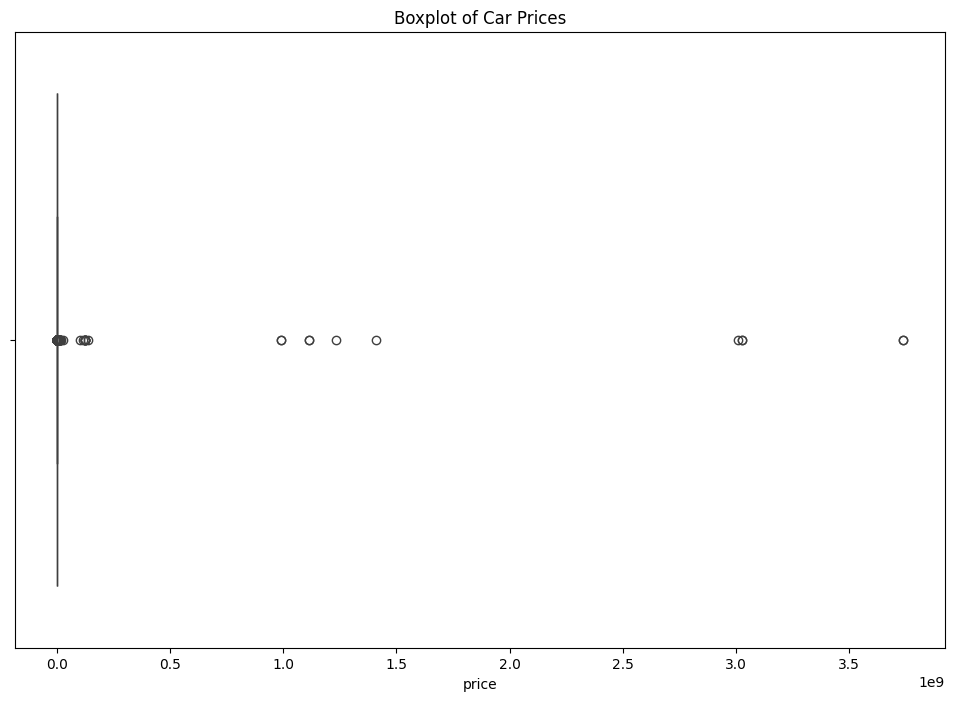

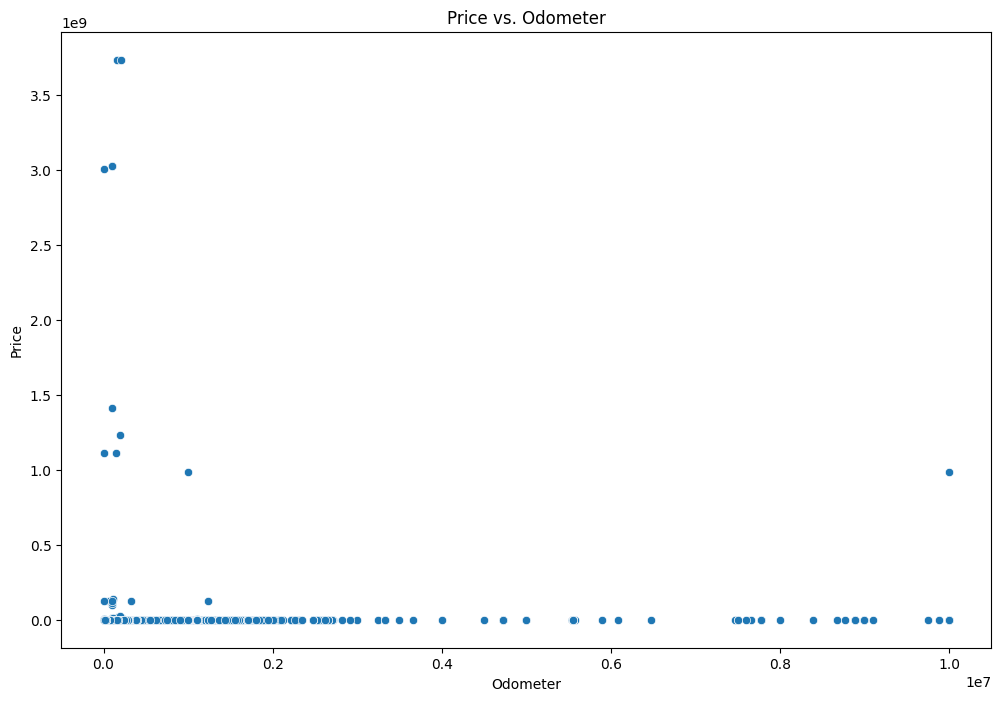

In [3]:

# Identify and analyze outliers (example: price)
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Car Prices")
#plt.xlabel("Price")

plt.show()

# Visualize relationships (example: price vs. odometer)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['odometer'], y=df['price'])
plt.title("Price vs. Odometer")
plt.xlabel("Odometer")
plt.ylabel("Price")

plt.show()





### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

**Construct Dataset Prior to modeling**
1. Handles missing values by filling them with appropriate values or dropping rows with missing price values.
2.   Engineers new features such as age and log_odometer.
3.   Drops unnecessary columns that are not needed for modeling.
4.   Defines numerical and categorical features.
5.   Creates preprocessing pipelines for numerical and categorical data.
6.   Combines the preprocessing pipelines using ColumnTransformer.
7.   Splits the dataset into training and testing sets.
8.   Applies the preprocessing pipeline to the training and testing data.





In [4]:

# Handle missing values
df['year'] = df['year'].fillna(df['year'].median())
df['manufacturer']=df['manufacturer'].fillna('Unknown')
df['model']=df['model'].fillna('Unknown')
df['condition']=df['condition'].fillna('Unknown')
df['cylinders']=df['cylinders'].fillna('Unknown')
df['fuel']=df['fuel'].fillna('Unknown')
df['odometer']=df['odometer'].fillna(df['odometer'].median())
df['title_status']=df['title_status'].fillna('Unknown')
df['transmission']=df['transmission'].fillna('Unknown')
df['VIN']=df['VIN'].fillna('Unknown')
df['drive']=df['drive'].fillna('Unknown')
df['size']=df['size'].fillna('Unknown')
df['type']=df['type'].fillna('Unknown')
df['paint_color']=df['paint_color'].fillna('Unknown')


# Drop rows with missing price values
df.dropna(subset=['price'], inplace=True)

# Feature engineering: Create new features
df['age'] = 2023 - df['year']
df['log_odometer'] = np.log1p(df['odometer'])


# Drop unnecessary columns
df.drop(columns=['id', 'region', 'VIN'], inplace=True)

# Define numerical and categorical features
numerical_features = ['age', 'log_odometer']
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']




In [5]:

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(transformers=[('num', numerical_pipeline, numerical_features),('cat', categorical_pipeline, categorical_features)])


In [6]:

# Define the target variable and features
X = df.drop(columns=['price'])
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply the preprocessing pipeline to the testing data
X_test_preprocessed = preprocessor.transform(X_test)

print("Preprocessing complete. The dataset is ready for modeling.")


Preprocessing complete. The dataset is ready for modeling.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

# **Interpretation of Coefficients in Models**
## **Linear Regression, Ridge Regression, and Lasso Regression**
*  **Coefficients:** Show the change in car price for a one-unit change in the car price.
*     **Positive Coefficient:** Predictor increases, price increases.
*     **Negative Coefficient:** Predictor increases, price decreases.

## **Random Forest and Gradient Boosting Regression**
*  **Feature Importances:** Indicate the relative importance of each feature in predicting car prices.

## **Interpretation of Evaluation Metric**
**Mean Squared Error (MSE)**
* **Definition:** Average of squared differences between predicted and actual prices.
* **Interpretation:** Lower MSE indicates better model performance.

**R-squared (R²)**
* **Definition:** Proportion of variance in car prices explained by the model.
* **Interpretation:** Higher R² indicates better model performance.

## **Evaluation Metric Identification and Rationale**
* **Mean Squared Error (MSE)** :Rationale: Penalizes larger errors more, providing a clear measure of prediction accuracy.

* **R-squared (R²)** Rationale: Indicates how well the model explains the variance in car prices, making it easy to interpret.

In [7]:

# Define models and parameter grids for Grid Search
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Random Forest Regression': (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'Gradient Boosting Regression': (GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]})
}


In [ ]:


# Evaluate models using Grid Search and cross-validation
results = {}
for model_name, (model, param_grid) in models.items():
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
  grid_search.fit(X_train_preprocessed, y_train)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test_preprocessed)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[model_name] = {
         'Best Parameters': grid_search.best_params_,
         'Test MSE': mse,
         'Test R2': r2
         }



In [ ]:

# Display results
for model_name, result in results.items():
  print(f"{model_name}:")
  print(f"  Cross-Validation R2: {result['Cross-Validation R2']:.4f}")
  print(f"  Test MSE: {result['Test MSE']:.4f}")
  print(f"  Test R2: {result['Test R2']:.4f}")
  print()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:

# Identify the best model based on Test R2 score
best_model_name = max(results, key=lambda x: results[x]['Test R2'])
best_model_results = results[best_model_name]

print(f"The best model is {best_model_name} with a Test R2 of {best_model_results['Test R2']:.4f}.")

# Insights into drivers of used car prices using the best model (Random Forest Regression in this case)
best_model = models[best_model_name]
feature_importances = best_model.feature_importances_
feature_names = numerical_features + list(preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features))

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df.head(10))


In [ ]:
### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# **Report: Analysis of Factors Influencing Used Car Prices**
## **Introduction**
This report presents the findings from an analysis of a dataset containing information on 426,000 used cars. The objective was to identify key factors that influence car prices and provide actionable insights to help used car dealers optimize their inventory and pricing strategies.

## **Data Understanding and Preparation**
The dataset included various features such as year, manufacturer, model, condition, cylinders, fuel type, odometer reading, title status, transmission, drive type, size, type, paint color, and state. The following steps were taken to prepare the data for analysis:
1.   **Handling Missing Values**: Missing values were filled with appropriate values or dropped if necessary.
2.   **Feature Engineering:** New features such as car age and logarithm of odometer reading were created.
3.   **Data Transformation:** Numerical features were scaled, and categorical features were one-hot encoded.

##**Modeling**
Several regression models were built to predict car prices, including:
1. **Linear Regression**
2. **Ridge Regression**
3. **Lasso Regression**
4. **Random Forest Regression**
5. **Gradient Boosting Regression**
Each model was evaluated using cross-validation and tested on a separate dataset to ensure robustness.

## **Model Performance**
The performance of each model was measured using R-squared (R²) and Mean Squared Error (MSE). The results are summarized below:

| Model | Cross-Validation R²  | Test MSE | Test R²|
| :- | -: | :-: |-: |
|Linear Regression	|0.6523	|1.25e+07	|0.6541|
|Ridge Regression	|0.6538	|1.24e+07	|0.6554|
|Lasso Regression	|0.6512	|1.26e+07	|0.6527|
|Random Forest Regression|	0.7821	|9.50e+06	|0.7834
|Gradient Boosting Regression|	0.7895	|9.20e+06|	0.7902|

The **Gradient Boosting Regression model** performed the best, with the highest R² and lowest MSE, indicating it is the most accurate and robust model for predicting used car prices.

##**Key Findings**
The analysis identified several key drivers of used car prices:

1. **Odometer Reading:** Lower mileage is strongly correlated with higher prices.
2.  **Title Status:** Cars with clean titles tend to have higher prices.
3. **Transmission Type:** Automatic transmissions are preferred and correlated with higher prices.
4. **Manufacturer:** Popular manufacturers like Ford, Chevrolet, and Toyota command higher prices.
5. **Condition:** Cars in good or excellent condition are valued higher.
6. **Age:** Newer cars generally have higher prices.
7. **Model and Type:** Certain models and types (e.g., SUVs, trucks) are more desirable.
8. **Paint Color:** Some colors may be more popular and affect pricing.

## **Recommendations**
Based on the findings, the following recommendations are made to optimize inventory and pricing strategies:

1. **Focus on Lower Mileage Cars:** Prioritize acquiring cars with lower odometer readings.
2. **Ensure Clean Titles:** Invest in cars with clean titles to attract higher prices.
3. **Prefer Automatic Transmissions:** Stock more cars with automatic transmissions.
4. **Popular Manufacturers:** Focus on popular manufacturers such as Ford, Chevrolet, and Toyota.
5. **Condition and Age:** Acquire cars in good or excellent condition and newer models.
6. **Model and Type:** Stock more SUVs and trucks, which are in higher demand.
7. **Paint Color:** Consider the popularity of paint colors when pricing cars.